In [200]:
import numpy as np
import pandas as pd

import importlib

import preprocessing
importlib.reload(preprocessing)

data_runs = preprocessing.load_data()
data_runs_concat = pd.concat(data_runs, ignore_index=True)
data_runs_concat.head()
dir(preprocessing)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'hi',
 'ho',
 'load_data',
 'merge_rows',
 'np',
 'pd',
 'shuffle_rows',
 'yo']

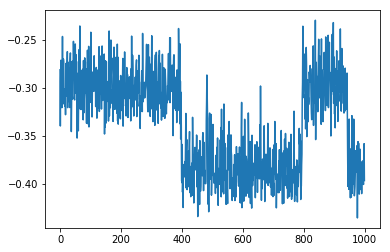

In [72]:
import matplotlib.pyplot as plt
# plt.plot(data_runs_concat)
plt.plot(data_runs[0].loc[:, 'BF6'])
# plt.plot(data_runs[0].loc[:, 'BF10'])
plt.show()

In [79]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [553]:
# Predict BF6 using all other ports
data_1 = data_runs[0]
training_X_1 = data_1.iloc[:800, :].drop(labels='BF6', axis='columns')
training_y_1 = data_1.iloc[:800, :].loc[:, 'BF6']
testing_X_1 = data_1.iloc[800:, :].drop(labels='BF6', axis='columns')
testing_y_1 = data_1.iloc[800:, :].loc[:, 'BF6']
model.fit(training_X_1, training_y_1)
print(model.score(training_X_1, training_y_1))
print(model.score(testing_X_1, testing_y_1))

0.9479609100556468
0.91120926768618


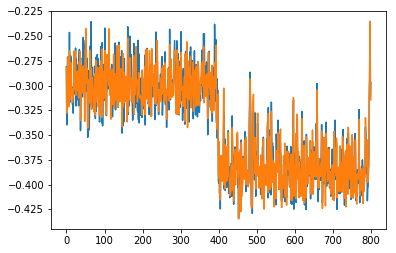

In [507]:
import matplotlib.pyplot as plt
plt.plot(np.arange(800), training_y_1)
prediction = model.predict(training_X_1)
plt.plot(np.arange(800), prediction)
plt.show()

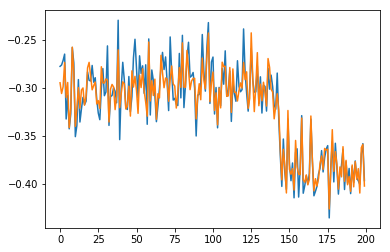

In [509]:
plt.plot(np.arange(200), testing_y_1)
prediction = model.predict(testing_X_1)
plt.plot(np.arange(200), prediction)
plt.show()

In [124]:
# Predict BF6 using all front and side ports
data_2 = data_runs[0]
dropped_labels_2 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
training_X_2 = data_2.iloc[:800, :].drop(labels=dropped_labels_2, axis='columns')
training_y_2 = data_2.iloc[:800, :].loc[:, 'BF6']
testing_X_2 = data_2.iloc[800:, :].drop(labels=dropped_labels_2, axis='columns')
testing_y_2 = data_2.iloc[800:, :].loc[:, 'BF6']
model.fit(training_X_2, training_y_2)
print(model.score(training_X_2, training_y_2))
print(model.score(testing_X_2, testing_y_2))

0.801486588782743
0.6657275895325129


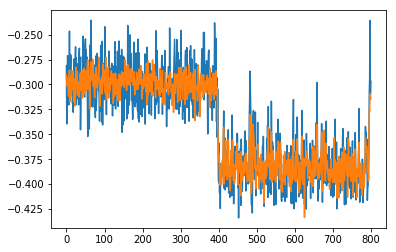

In [524]:
plt.plot(np.arange(800), training_y_2)
prediction = model.predict(training_X_2)
plt.plot(np.arange(800), prediction)
plt.show()

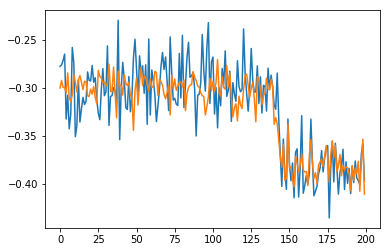

In [125]:
plt.plot(np.arange(200), testing_y_2)
prediction = model.predict(testing_X_2)
plt.plot(np.arange(200), prediction)
plt.show()

In [550]:
# Predict back ports average using all front and side ports
data_3 = data_runs[0]
dropped_labels_3 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
training_X_3 = data_3.iloc[:800, :].drop(labels=dropped_labels_3, axis='columns')
training_y_3 = data_3.iloc[:800, :].loc[:, 'BF1':'BF16'].mean(axis='columns')
testing_X_3 = data_3.iloc[800:, :].drop(labels=dropped_labels_3, axis='columns')
testing_y_3 = data_3.iloc[800:, :].loc[:, 'BF1':'BF16'].mean(axis='columns')
model.fit(training_X_3, training_y_3)
print(model.score(training_X_3, training_y_3))
print(model.score(testing_X_3, testing_y_3))

0.19863830054622367
0.11256895483651685


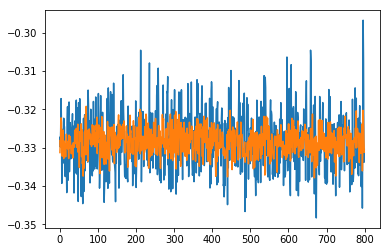

In [551]:
plt.plot(np.arange(800), training_y_3)
prediction = model.predict(training_X_3)
plt.plot(np.arange(800), prediction)
plt.show()

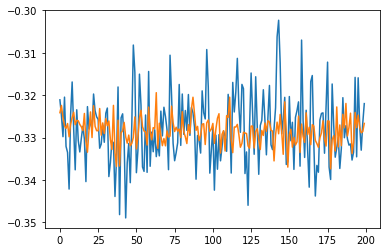

In [552]:
plt.plot(np.arange(200), testing_y_3)
prediction = model.predict(testing_X_3)
plt.plot(np.arange(200), prediction)
plt.show()

In [191]:
# Predict every 5th BF6 sample using prev 5 front and side port samples

# data_4 = data_runs[0]
data_4 = data_runs_concat
dropped_labels_4 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
X_4_initial = data_4.drop(labels=dropped_labels_4, axis='columns')
y_4_initial = data_4.loc[:, 'BF6']

X_4, y_4 = preprocessing.merge_rows(X_4_initial, y_4_initial, 5)

X_y_4 = pd.concat([X_4, y_4], axis='columns', ignore_index=True)
X_y_4 = X_y_4.sample(frac=1).reset_index(drop=True)
X_4 = X_y_4.iloc[:, 0:-1]
y_4 = X_y_4.iloc[:, -1:]

training_X_4 = X_4.iloc[:3000, :]
training_y_4 = y_4.iloc[:3000, :]
testing_X_4 = X_4.iloc[3000:, :]
testing_y_4 = y_4.iloc[3000:, :]
model.fit(training_X_4, training_y_4)
print(model.score(training_X_4, training_y_4))
print(model.score(testing_X_4, testing_y_4))
print(X_4.shape)

0.8069382962925945
0.7989355335482542
(3400, 115)


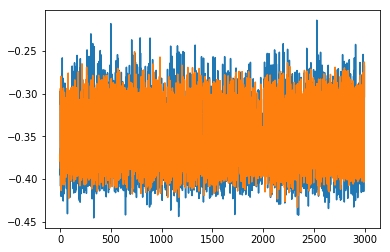

In [192]:
plt.plot(np.arange(training_y_4.size), training_y_4)
prediction = model.predict(training_X_4)
plt.plot(np.arange(prediction.size), prediction)
plt.show()

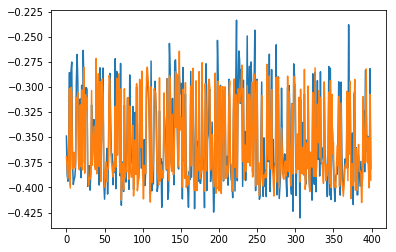

In [193]:
plt.plot(np.arange(testing_y_4.size), testing_y_4)
prediction = model.predict(testing_X_4)
plt.plot(np.arange(prediction.size), prediction)
plt.show()